# # NBA player Cluster analysis #<br />

# Contents<br />

# 1. Introduction
## 1) 농구의 포지션 이란? 스탯?
### - 포지션
### - 스탯
## 2) Motivation
## 3) 데이터 수집 및 전처리<br />

# 2. Model setup
## 1) Classfication 모델 선택
### (1) kmeans(kmeans++)
### (2) heirarchical clustering
### (3) EM clustering
### (4) 가장 결과가 좋은 것? kmeans++
## 2)  클러스터 분석<br />

# 3. Apply basketball analysis by clustering data

# 4. Conclusion & further reserch
# 5. References<br /><br /><br /><br />

# I. Introduction<br />

## 1) 농구의 포지션 이란? 스탯?

### - 포지션
![position](https://static1.squarespace.com/static/561a6270e4b0cbb5768713d9/t/575ec9db2b8ddeb3fba7d478/1465829885170/Basketball+Positions)<br />

모든 NBA 선수들은 플레이하는 역할에 따른 '포지션'이라는 라벨을 가지고 있다.<br />
 전통적인 포지션은 다음과 같다<br />
  * **포인트 가드(PG)** - 팀의 **사령탑** 역할을 하며 보통 팀에서 가장 **전술적 이해**가 좋은 선수가 맡는다. 
  * **슈팅 가드(SG)** - **3PT** 등 장거리에서 슛을 하여 점수를 얻는 것을 주역할로 한다.
  * **스몰 포워드(SF)** - 점수를 얻는 것을 주된 역할로 한다. 외곽 슛, 속공 및 리바운드 싸움에도 참여할 수 있는 **올라운드 능력**이 요구됨.
  * **파워 포워드(PF)** - 코트 골밑에서 수비, 득점을 주요 역할로 하고 **리바운드**와 **골밑에서의 몸싸움 및 득점 능력** 등 파워풀한 플레이가 요구됨.
  * **센터(C)** - 골밑 중앙에서 활동하는 포지션. 공격에서는 **골밑슛**을 책임지고 수비에서는 가장  **페인트존을 책임지며** 상대의 슛을 블로킹으로 차단하는 역할까지 한다.<br />




### - 스탯
![position](http://cfile24.uf.tistory.com/image/236ADE335980760C33F998)

- 왼쪽 위부터 **리바운드**, **3점슛**, **블로킹**, **스틸**

  -- 리바운드 : 슈팅이 성공하지 못하고 **튕겨 나왔을 때** 잡는 것  
  
  -- 3점슛 : **24피트** 밖에서 던지는 슈팅  
  
  -- 블로킹 : 상대가 슛한 공을 수비가 반칙이 아닌 선에서 **쳐내는 것**  
  
  -- 스틸 : 상대가 가지고 있는 공을 반칙이 아닌 선에서 **가로채는 것**

   **이 밖에도 득점, 어시스트, 슛 성공율, 파울, 자유투 등 다양한 스탯들이 존재**

## 2) Motivation

하지만 오늘날의 게임 방식은 크게 달라졌다. 선수들의 **장거리 슛 성공률**이 높아짐에 따라 팀들의 3점 활용이 늘었고, 그에 따라 3점 슛을 방어하기 위해 바스켓에서 더 멀리 수비라인을 넓혀갔다. 이에 따라 수비라인 간격이 벌어지며 다른 플레이어가 3점 슛 라인 안쪽에서 활약할 수 있는 공간이 훨씬 넓어졌다. 이전에는 주로 3점 슛을 던지는 포지션이 **가드**였다면 현재는 모든 포지션에서 **3점슛의 점유율이 증가**하였다.<br />
 
![position](https://cdn-images-1.medium.com/max/800/1*V2oTbyr5gBcmEr_qAxEliw.jpeg)<br />


이 분석은 현대 농구의 플레이 스타일이 전통적인 방법으로 나눈 5개의 포지션 구분을 무너뜨렸다 생각하여 시작하게 되었다. 우리가 선택한 이 주제는 **전통적인 포지션 분류를 재정의** 하며 선수의 플레이 스타일에 따른 포지션의 재정의, 선수의 구분 그리고 그에 따른 **인사이트 발견을 통해 심도있는 선수분석**을 목적으로 한다.<br />

## 3) 데이터 수집 및 전처리

### - 데이터 출처

 * NBA.com
 * NBAminer.com
 * Basketball-reference
 * ESPN.com
 * Elias Sports Bureau
 * Spotrac.com  
 
### - 데이터 전처리
####  *이상치의 발생 및 처리
![position](http://cfile4.uf.tistory.com/image/2491B8335980818825F66C)
<br />
 
- 위의 그림에서 보다시피 **출전 경기가 적고, 출장시간이 적은 선수**들은 비율 스탯 등이 이상치로 나타날 수 있다. **ex)슛 성공율 100%, 0% 나타남**  
 이런 이상치를 제거하기 위해 **출전 경기 30경기 이상, 경기당 평균 출전시간 10분 이상**의 선수만 선택하여 진행하였다.
 
  각종 논문 및 리포트에서도 클러스터 분석 등에 총 한시즌 출전 시간 500분 이상, 30경기 이상 출전,   
  평균 출전시간 10분 이상, 평균 10분 이상 출전 등을 기준으로 하여 사용한 것을 볼 때 위의 기준이 **사용 가능**하다는 것을 알 수 있다.

#### *30게임 이상, 평균출전시간 10분 이상인 선수 추출

In [10]:
%matplotlib inline
pd.options.display.max_columns = 150

In [11]:
data = pd.read_csv("player2.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=30]
data = data[data["Min"]>=10]
data.shape

(6929, 152)

In [14]:
data.columns

Index([u'Player', u'Team', u'Season', u'Season Type', u'Games',
       u'Above the Break 3-Usage', u'Mid-Range-Usage',
       u'In The Paint (Non-RA)-Usage', u'Restricted Area-Usage',
       u'Right Corner 3-Usage', u'Left Corner 3-Usage', u'Above the Break 3 %',
       u'Mid-Range %', u'In The Paint (Non-RA) %', u'Restricted Area %',
       u'Right Corner 3 %', u'Left Corner 3 %', u'Personal Fouls PG',
       u'Charges Drawn', u'Off. Fouls Drawn', u'Off. Fouls',
       u'Defensive 3 Seconds', u'Shooting Fouls Committed', u'Lost Ball Fouls',
       u'Defensive Goaltendings', u'Blocks Against', u'Total Points',
       u'Assisted FG Pct.', u'Blocked FG Pct.', u'Last Min. FGM',
       u'Last Min. FGA', u'Last Min. FG%', u'Avg. Shot Dist.',
       u'Avg. Made Shot Dist.', u'FT Rate', u'Triple Doubles',
       u'Double Doubles', u'25+ Pts Games', u'10+ Reb Games', u'10+ Ast Games',
       u'3+ Blk Games', u'3+ Stl Games', u'3+ 3PTM Games', u'Bad Pass TO PG',
       u'Lost Ball TO PG', u'Tra

#### *변수 정리

col = [**Basic stats**
 : Games, Min, Pts, Reb, Ast .......  
**Clutch Time stats**
 : Total Points, FG% Diff, 3FG Diff .......  
**Advanced stats**
 : Total Plus/Minus, Ts%, Triple Doubles .......   
**Nasty stats**
 : Ejections, Blocks Against, Defensive 3Secs .......  
**Shot Distances**
 : Less than 8ft. %, Back Court Shots %, Avg. Shot Dis.(ft.) .......  
**Shot types**
 : Dunks, Jump Shot %, Assisted FGM %,  .......  
**Shot zones**
 : Above the Break 3-Usage, Right Corner 3-Usage, Restriced Area % .......  
**Assist Details**
 : Assted FG%, Avg. Assisted Shot Distance, Assisted Jump Shot %.......  
**Turnover Details**
 : Lost Ball TO PG, Bad Pass TO PG, Traveling PG.......  
**Foul Details**
 : Off.Fouls Drawn, Shooting Fouls Committed, Lost Ball Fouls.......  
**Four Point & And One**
 : Four Point Plays, And One, Extra Free Throw % .......]
 
 - 이번 분석에서는 총 **152개의 변수에서 실제 NBA 기록의 중요도 및 중복되는 부분을 감안하여 90개의 변수를 사용하여 분석**하였다.  
90개의 경우 농구 기록의 범위를 살펴볼 때 많은 것으로 여겨질 수 있지만,  
다른 논문에서 변수 각각이 설명할 수 있는 범위를 넓히기 위하여 **총 80개의 변수를 사용하였던 예**를 볼 때, **분류 정확도**를 높이기 위하여 90개의 변수를 사용하는 것은 무리가 없다고 가정하고 진행하였다.

In [15]:
data = data.reset_index()
del data["index"]

In [16]:
pos = data["Pos"]

In [17]:
player = data[["Player", "Team","Season"]]

In [18]:
dfX = data.iloc[:, 5:151]

In [21]:
C= dfX[dfX.Pos == "C"]
PF= dfX[dfX.Pos == "PF"]
SF= dfX[dfX.Pos == "SF"]
PG = dfX[dfX.Pos == "PG"]
SG = dfX[dfX.Pos == "SG"]

In [22]:
dfy = data["Pos"]

In [25]:
dfX = dfX.iloc[:,:-1]

#### * 데이터 스케일링
- StandardScaler를 통한 데이터 스케일링


In [26]:
from sklearn.preprocessing import StandardScaler
stdDf= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

# 2. Model setup

### (1) kmeans(kmeans++)

In [164]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="k-means++", random_state=1).fit(stdDf.iloc[:,:-1])
model = model.predict(stdDf.iloc[:,:-1])
dfX["cluster"] = model

### (2) hierarchical clustering

In [166]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=10).fit(stdDf.iloc[:,:-1])
model_2 = model2.labels_

### (3) EM clustering

In [168]:
from sklearn.mixture import GaussianMixture
model3 = GaussianMixture(n_components=10, init_params='random', random_state=0).fit(stdDf.iloc[:,:-1])
model_3 = model3.predict(stdDf.iloc[:,:-1])

### (4) 가장 결과가 좋은 것? kmeans++

In [177]:
def silhouette(df, label):
    from sklearn.metrics import silhouette_score
    a = silhouette_score(df, label)
    return a 

In [178]:
kmeans = silhouette(stdDf.iloc[:,:-1], model)
hierarchical = silhouette(stdDf.iloc[:,:-1], model_2)
EM = silhouette(stdDf.iloc[:,:-1], model_3)

In [192]:
result = pd.DataFrame([kmeans, hierarchical,EM]).rank(ascending=False)
result.index = ["k-means","Hierarchical","EM"]

In [193]:
result

,0
k-means,1.0
Hierarchical,2.0
EM,3.0


#### k-means의 silhouette 값이 제일 높으므로 이하에서는 k-means로 클러스터링을 진행하도록 하겠다.<br /><br /><br />

## 2) 클러스터 분석

### - 클러스터 속성 분석

10개의 클러스터를 인덱스로 feature 평균을 데이터프레임으로 작성, 클러스터별 속성을 분석하였다

In [29]:
mean_kmeans = dfX.groupby("cluster").mean().reset_index()

In [99]:
mean_kmeans[["Pts", "3PTA","Jump Shots", "OReb", "Dreb",  "Blk", "Ast", "Stl",  
       'Above the Break 3-Usage', 'Mid-Range-Usage','In The Paint (Non-RA)-Usage', 'Restricted Area-Usage',
       'Right Corner 3-Usage', 'Left Corner 3-Usage', 'Assists to Dunks PG', 'Assists to Layups PG', 'Assists to Jump Shots PG','Dunks','Layups',
       'Assists to 3 Pointers PG' , 'Min']].sort_values(by="Mid-Range-Usage", ascending=False)

,Pts,3PTA,Jump Shots,OReb,Dreb,Blk,Ast,Stl,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Dunks,Layups,Assists to 3 Pointers PG,Min
2,6.095173,0.637136,67.993251,1.017582,2.348285,0.373112,1.079554,0.572131,7.193746,41.632676,13.610515,33.679990,1.827542,1.870337,0.122785,0.274381,0.675302,5.370406,23.847096,0.244777,18.265917
3,15.415621,2.373035,69.902847,1.417023,4.072890,0.542832,2.736864,1.096069,12.976387,36.636301,13.800997,31.532413,2.340549,2.554783,0.322558,0.703064,1.691329,4.664176,23.823526,0.644234,32.999306
5,23.901629,4.780682,73.621932,1.084015,4.359318,0.473295,5.092576,1.432159,21.585379,34.711439,11.839205,27.401477,1.964280,2.303561,0.733939,1.232348,3.104773,3.392614,22.269394,1.381970,37.742879
4,7.150965,1.839671,74.819759,0.400011,1.658750,0.130768,2.921020,0.728235,21.486217,33.674759,12.142884,26.243695,2.921151,3.141184,0.361667,0.670987,1.871053,1.067029,23.712050,0.688103,20.289156
9,14.961109,3.130565,72.417370,0.705761,3.006435,0.234000,6.925413,1.409478,20.077587,33.614435,13.378087,28.780457,1.797130,2.099000,0.944739,1.718239,4.218739,0.836304,26.417130,1.551022,33.721565
7,18.607529,0.494684,60.525259,2.815431,7.126034,1.552759,2.516954,0.956207,2.447586,31.800862,22.708190,42.281925,0.330690,0.336121,0.261897,0.737098,1.501322,9.843276,26.170144,0.697615,35.155431
1,12.196564,4.305826,79.985933,0.697262,2.933248,0.305034,2.380832,0.937208,29.954027,27.839436,8.841141,20.928993,5.882134,6.331503,0.309785,0.595114,1.466819,2.115436,17.066631,0.593758,29.026899
8,9.888494,0.115575,53.125945,2.417675,4.804320,1.100528,1.200251,0.664214,0.880423,27.329736,21.107728,50.222602,0.189498,0.183104,0.127530,0.325799,0.741757,11.384478,29.815627,0.309723,26.827807
6,5.950375,2.436227,81.124309,0.505863,1.914684,0.225241,1.141447,0.538617,29.262626,26.510686,7.444737,19.749764,8.308928,8.490161,0.132036,0.270386,0.733462,2.373794,15.314802,0.300118,18.275552
0,4.700927,0.037565,42.428838,1.538974,2.652447,0.653795,0.595476,0.434462,0.597713,19.005352,18.937342,61.052200,0.139580,0.157182,0.061409,0.155624,0.375451,13.832299,36.190457,0.156539,16.206527


In [31]:
first_cluster = dfX

In [37]:
def cluster_plot(dfX, n_clusters):
    col =  dfX.columns

    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

    plt.figure(figsize=(16,9), dpi=200)

    plt.subplot(311)
    half = int((len(col) - 4) / 2)
    c = col[ : half]
    ind = range(len(c))
    
    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[:half], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


    plt.subplot(313)
    c = col[half : len(col)-1]
    ind = range(len(c))

    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[half:len(b)-1], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    plt.show()

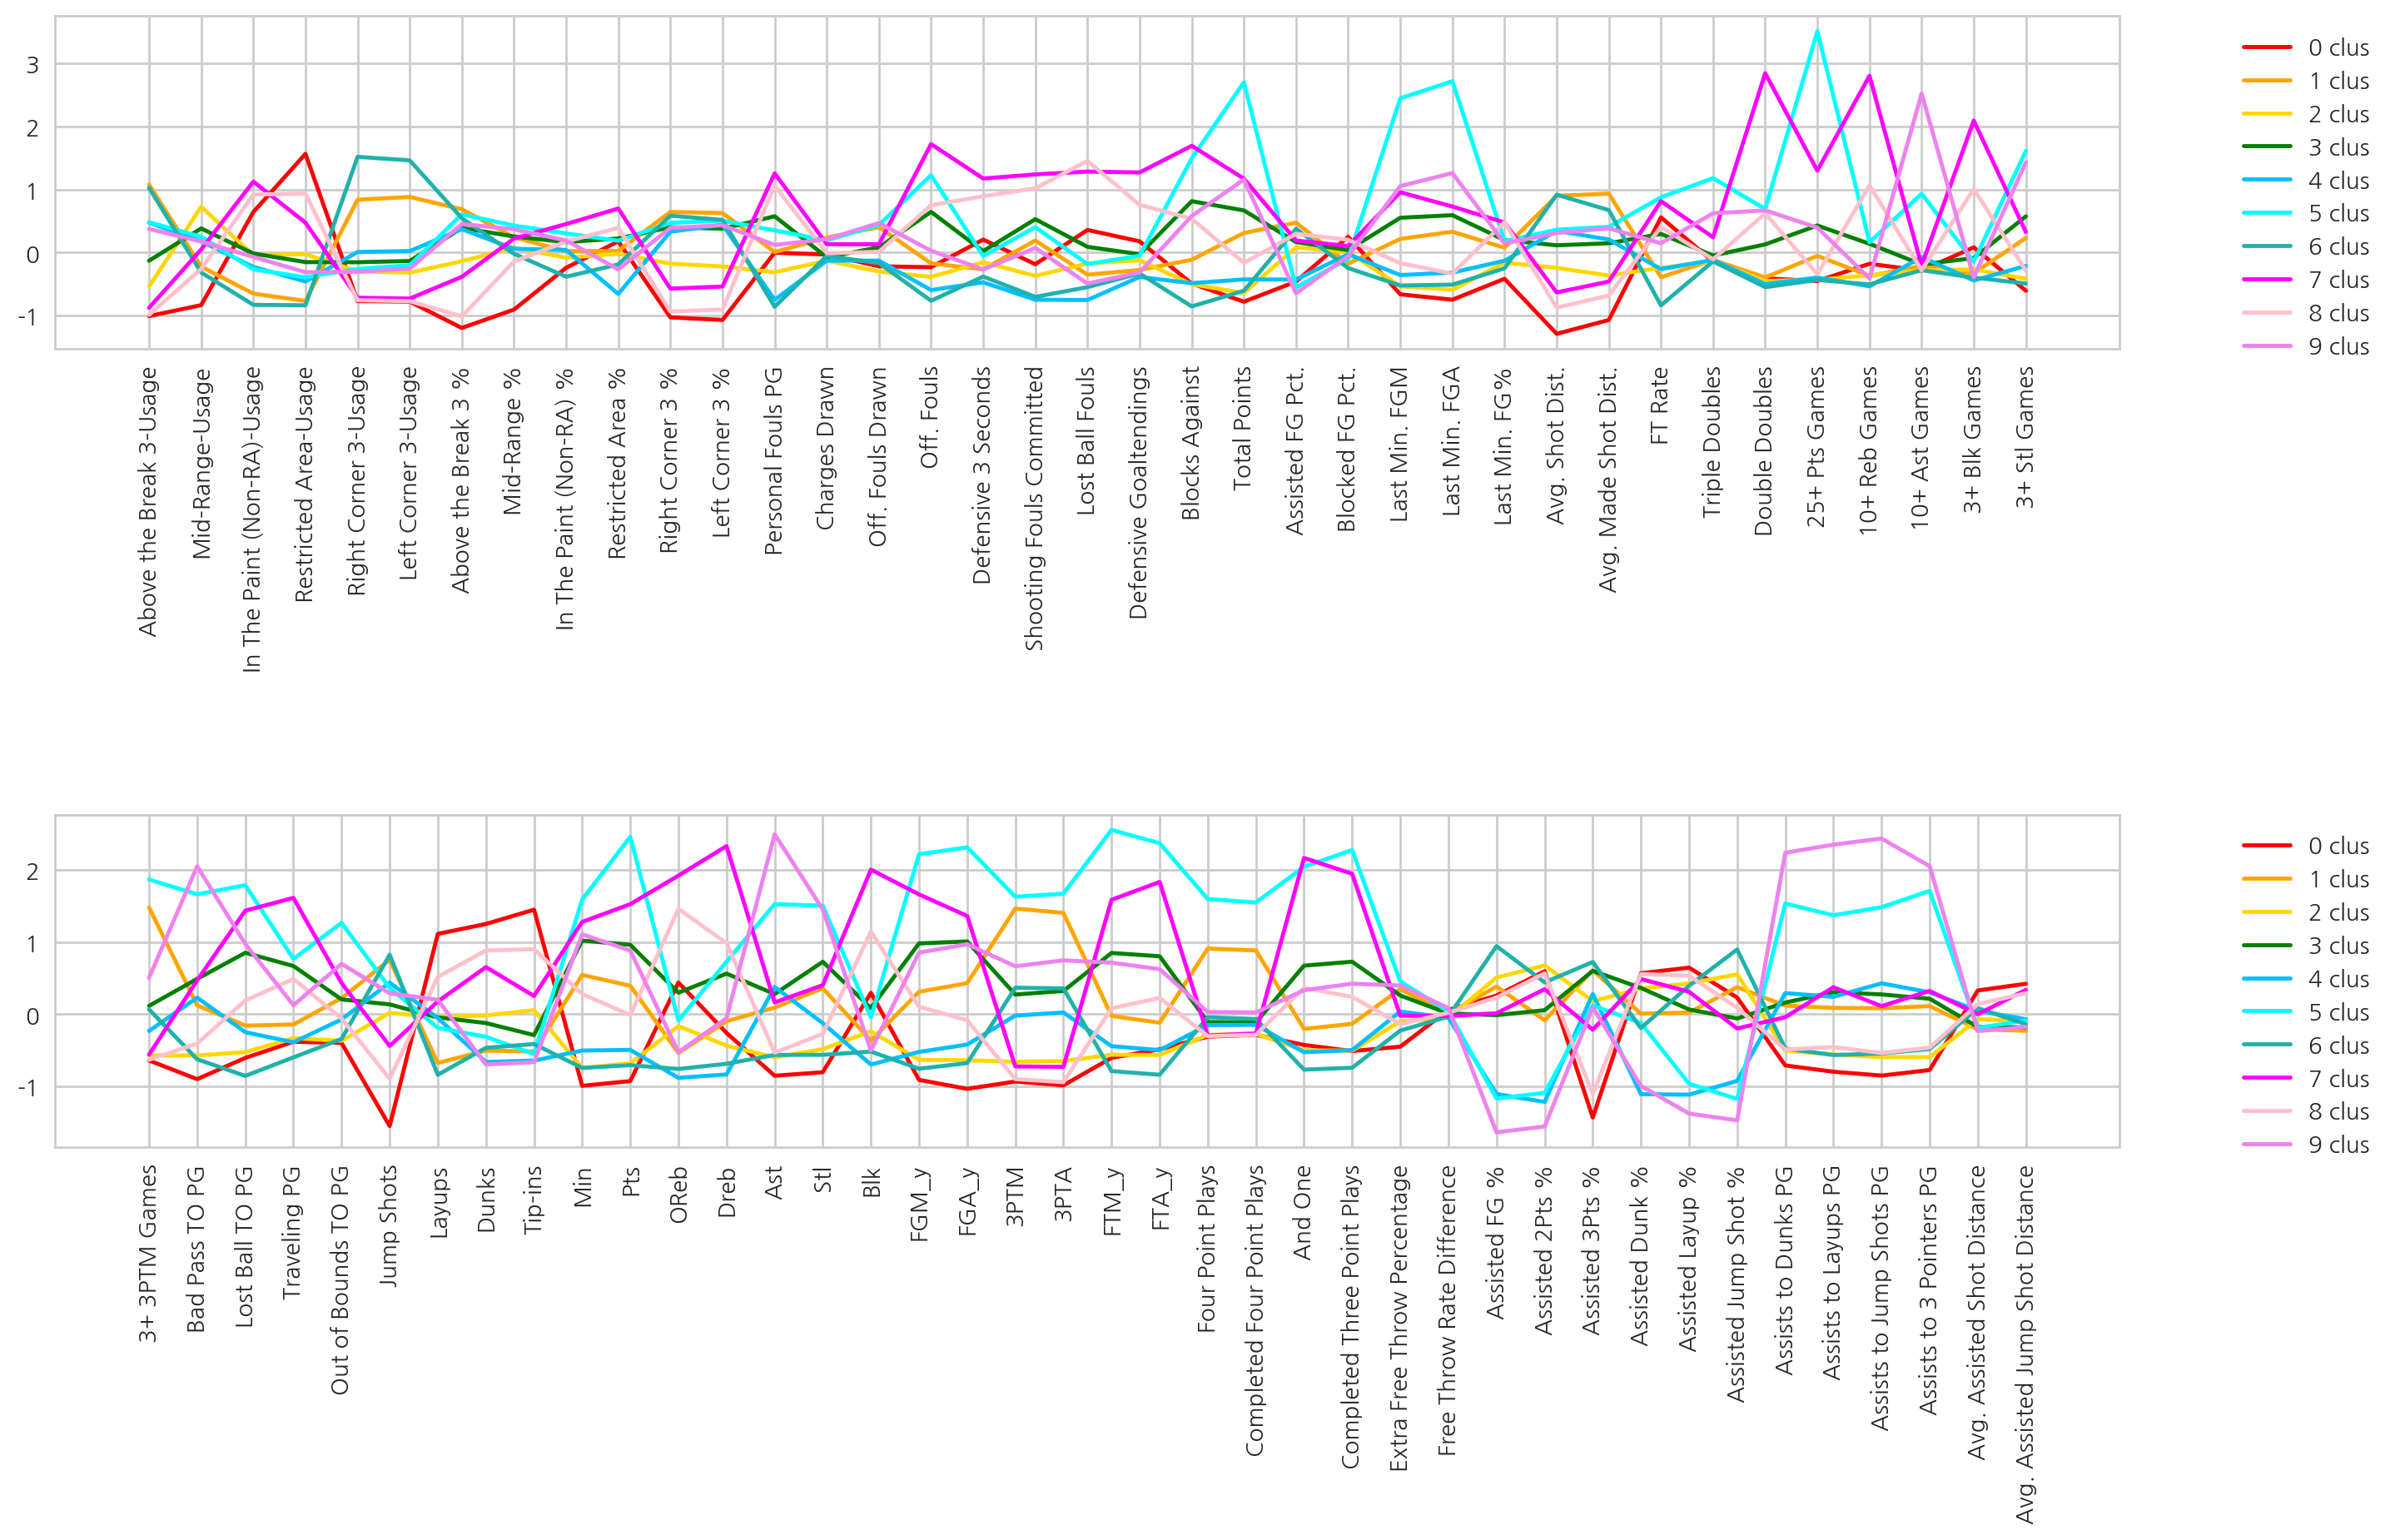

In [38]:
stdDf["cluster"] = model
cluster_plot(stdDf, 10)

클러스터에 높은 값을 가진 feature 순위를 매겨 중요속성을 골라내었고, 선수의 플레이스타일을 정의하여 클러스터에 새롭게 라벨링을 해주었다.

* Classic big : 골밑에서의 **득점, 공격 및 수비 리바운드**와 **블록**에 능한 선수 #0
* Aggressive big : **공격 리바운드와 블록, 득점력**이 강한 선수  # 7
* Non-scoring Big : **리바운드와 블록에 강점**이 있지만 득점력이 약한 선수  #8
* Midrange Stopper : **필드골 득점력과 리바운드** 및 **블록샷 등 수비**에 강점이 있는 선수 #3
* Balanced wing scorer : **측면 공격, 3점슛, 패스를 받아 넣는 필드골**에 강점이 있는 선수 #6
* Ball Handler : 돌파 등을 통해서 **본인이 만들어서 득점을 하며 2차 어시스트**에 강점이 있는 선수 #4
* Long shooter : **3점 슛 득점력이 가장 뛰어난** 선수 #1
* All-Round Player : **득점, 어시스트, 리바운드, 3점 슛 성공률**등 여러 스탯에 강점이 있는 선수 #5
* Defensive passer : **어시스트와 스틸에 강점**이 있고 **수비적**인 성향이 강한 선수 #2
* Commander : **어시스트를 주력**으로 하는 **득점력**을 겸비한 **플레이메이커** #9

In [123]:
naming = ["Classic big ","Long shooter","Defensive passer","Midrange Stopper","Ball Handler","All-Round Player","Balanced wing scorer","Aggressive big","Non-scoring Big","Commander"]

In [39]:
data = data.reset_index()
del data["index"]

In [72]:
first_cluster["Player"] = data["Player"]
first_cluster["Season"] = data["Season"]
first_cluster["Team"] = data["Team"]
first_cluster["Pos"] = pos

<br />

# 3. Apply basketball analysis by clustering data<br />

## 전체 시즌, 전체 포지션의 흐름

In [115]:
season = np.unique(first_cluster["Season"])
season

array(['1996-1997', '1997-1998', '1998-1999', '1999-2000', '2000-2001',
       '2001-2002', '2002-2003', '2003-2004', '2004-2005', '2005-2006',
       '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017'], dtype=object)

In [116]:
season0 = pd.DataFrame(first_cluster[first_cluster["Season"]=="1996-1997"]["cluster"].value_counts().sort_index())

for i in season[1:]:
    a = pd.DataFrame(first_cluster[first_cluster["Season"]==i]["cluster"].value_counts().sort_index())
    season0 = pd.concat([season0, a], axis=1)
    
season0.columns = season

In [117]:
season0.loc["sum", :] = season0.sum()

In [118]:
season0

,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,36.0,43.0,39.0,30.0,39.0,42.0,45.0,44.0,30.0,42.0,40.0,31.0,45.0,37.0,47.0,43.0,36.0,42.0,27.0,36.0,35.0
1,24.0,21.0,14.0,24.0,17.0,23.0,24.0,27.0,30.0,23.0,34.0,37.0,37.0,40.0,51.0,39.0,51.0,53.0,64.0,58.0,54.0
2,46.0,56.0,60.0,53.0,65.0,58.0,58.0,65.0,63.0,47.0,37.0,46.0,33.0,39.0,41.0,44.0,44.0,36.0,43.0,41.0,34.0
3,42.0,45.0,34.0,47.0,39.0,34.0,37.0,39.0,34.0,36.0,38.0,27.0,38.0,37.0,22.0,26.0,25.0,28.0,24.0,18.0,22.0
4,42.0,42.0,40.0,43.0,36.0,37.0,38.0,44.0,46.0,40.0,44.0,51.0,38.0,44.0,36.0,50.0,39.0,42.0,46.0,55.0,59.0
5,7.0,4.0,1.0,9.0,12.0,12.0,16.0,11.0,17.0,18.0,16.0,20.0,18.0,13.0,12.0,6.0,11.0,13.0,8.0,16.0,24.0
6,15.0,24.0,36.0,30.0,36.0,34.0,29.0,29.0,42.0,43.0,47.0,41.0,51.0,46.0,51.0,58.0,57.0,51.0,71.0,66.0,76.0
7,25.0,19.0,13.0,20.0,18.0,13.0,13.0,21.0,16.0,18.0,19.0,18.0,13.0,19.0,22.0,10.0,16.0,16.0,14.0,13.0,12.0
8,35.0,45.0,28.0,40.0,40.0,41.0,44.0,34.0,46.0,38.0,39.0,33.0,35.0,29.0,37.0,33.0,40.0,30.0,35.0,31.0,24.0
9,23.0,19.0,20.0,18.0,20.0,23.0,16.0,15.0,19.0,20.0,20.0,22.0,25.0,26.0,27.0,26.0,27.0,28.0,28.0,23.0,15.0


In [125]:
naming2 = naming + ["sum"]

In [126]:
season0 = season0.fillna(0)
season0.astype(int)
season0.index = naming2
season0

,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Classic big,36.0,43.0,39.0,30.0,39.0,42.0,45.0,44.0,30.0,42.0,40.0,31.0,45.0,37.0,47.0,43.0,36.0,42.0,27.0,36.0,35.0
Long shooter,24.0,21.0,14.0,24.0,17.0,23.0,24.0,27.0,30.0,23.0,34.0,37.0,37.0,40.0,51.0,39.0,51.0,53.0,64.0,58.0,54.0
Defensive passer,46.0,56.0,60.0,53.0,65.0,58.0,58.0,65.0,63.0,47.0,37.0,46.0,33.0,39.0,41.0,44.0,44.0,36.0,43.0,41.0,34.0
Midrange Stopper,42.0,45.0,34.0,47.0,39.0,34.0,37.0,39.0,34.0,36.0,38.0,27.0,38.0,37.0,22.0,26.0,25.0,28.0,24.0,18.0,22.0
Ball Handler,42.0,42.0,40.0,43.0,36.0,37.0,38.0,44.0,46.0,40.0,44.0,51.0,38.0,44.0,36.0,50.0,39.0,42.0,46.0,55.0,59.0
All-Round Player,7.0,4.0,1.0,9.0,12.0,12.0,16.0,11.0,17.0,18.0,16.0,20.0,18.0,13.0,12.0,6.0,11.0,13.0,8.0,16.0,24.0
Balanced wing scorer,15.0,24.0,36.0,30.0,36.0,34.0,29.0,29.0,42.0,43.0,47.0,41.0,51.0,46.0,51.0,58.0,57.0,51.0,71.0,66.0,76.0
Aggressive big,25.0,19.0,13.0,20.0,18.0,13.0,13.0,21.0,16.0,18.0,19.0,18.0,13.0,19.0,22.0,10.0,16.0,16.0,14.0,13.0,12.0
Non-scoring Big,35.0,45.0,28.0,40.0,40.0,41.0,44.0,34.0,46.0,38.0,39.0,33.0,35.0,29.0,37.0,33.0,40.0,30.0,35.0,31.0,24.0
Commander,23.0,19.0,20.0,18.0,20.0,23.0,16.0,15.0,19.0,20.0,20.0,22.0,25.0,26.0,27.0,26.0,27.0,28.0,28.0,23.0,15.0


In [127]:
# 각 시즌 전체 선수에 따른 해당 클러스터의 비율 
season1 = season0.iloc[:10,0:] / season0.loc["sum"]

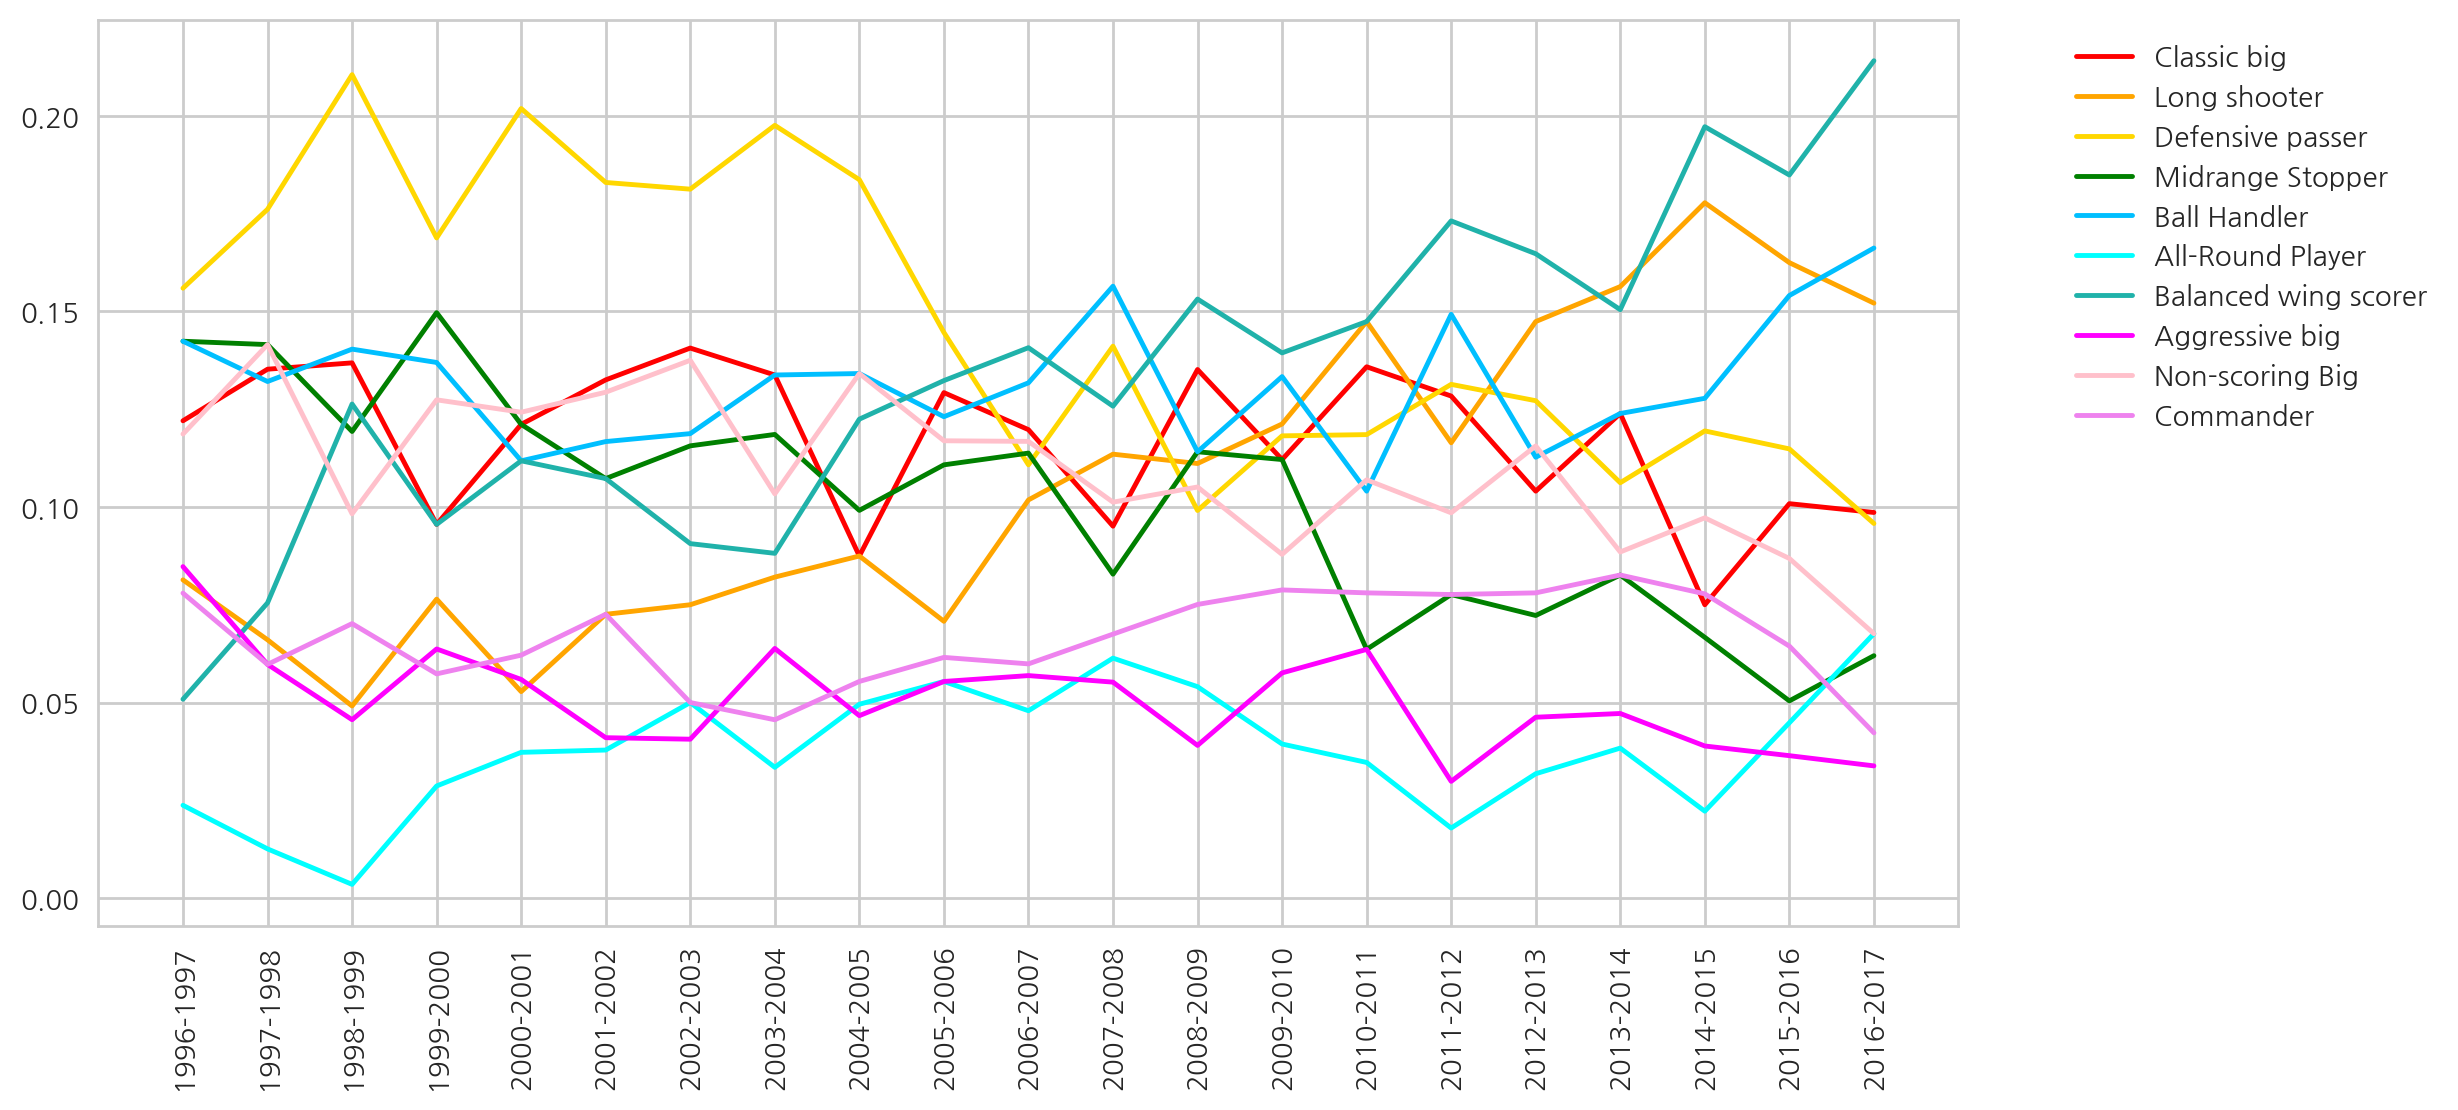

In [128]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)

for i in range(10):
    plt.plot(np.array(season1.iloc[i,:]), color=color[i], label = naming[i])

plt.xticks(range(21), season1.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 1. Balanced wing scorer , Long shooter는 증가의 추세를 가지며  
#### 2. Midrange stopper는 감소의 추세를 가진다.
#### 3. 하지만 나머지 포지션 같은 경우에는 시즌별 편차가 있어서 시대별 흐름에 따라 이를 더 자세히 검토하도록 하겠다.

- 1990 ~ 1999 : 센터의 시대(4대 센터)
- 2000 ~ 2009 : 슈팅가드의 전성시대
- 2010 ~ 2017 : 스몰볼 시대

(출처 : http://www.rookie.co.kr/news/articleView.html?idxno=6126)

## 1996 ~ 2017 추세

### r-square 값을 구해서 0.5이상인 것 들만 추세선으로 표현

In [141]:
coef = np.zeros([10,2])
coef_1 = np.zeros([10,2])
coef_2 = np.zeros([10,2])
coef_3 = np.zeros([10,2])

In [143]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(21).reshape(-1,1),season0.iloc[i,:])
    coef[i][0] = model.intercept_
    coef[i][1] = model.coef_
    print(model.score(np.arange(21).reshape(-1,1),season0.iloc[i,:]))

0.0173587279017
0.865058041387
0.499575880104
0.711790599534
0.273875306892
0.214100526888
0.876366825224
0.191136586671
0.249368241466
0.210296265129


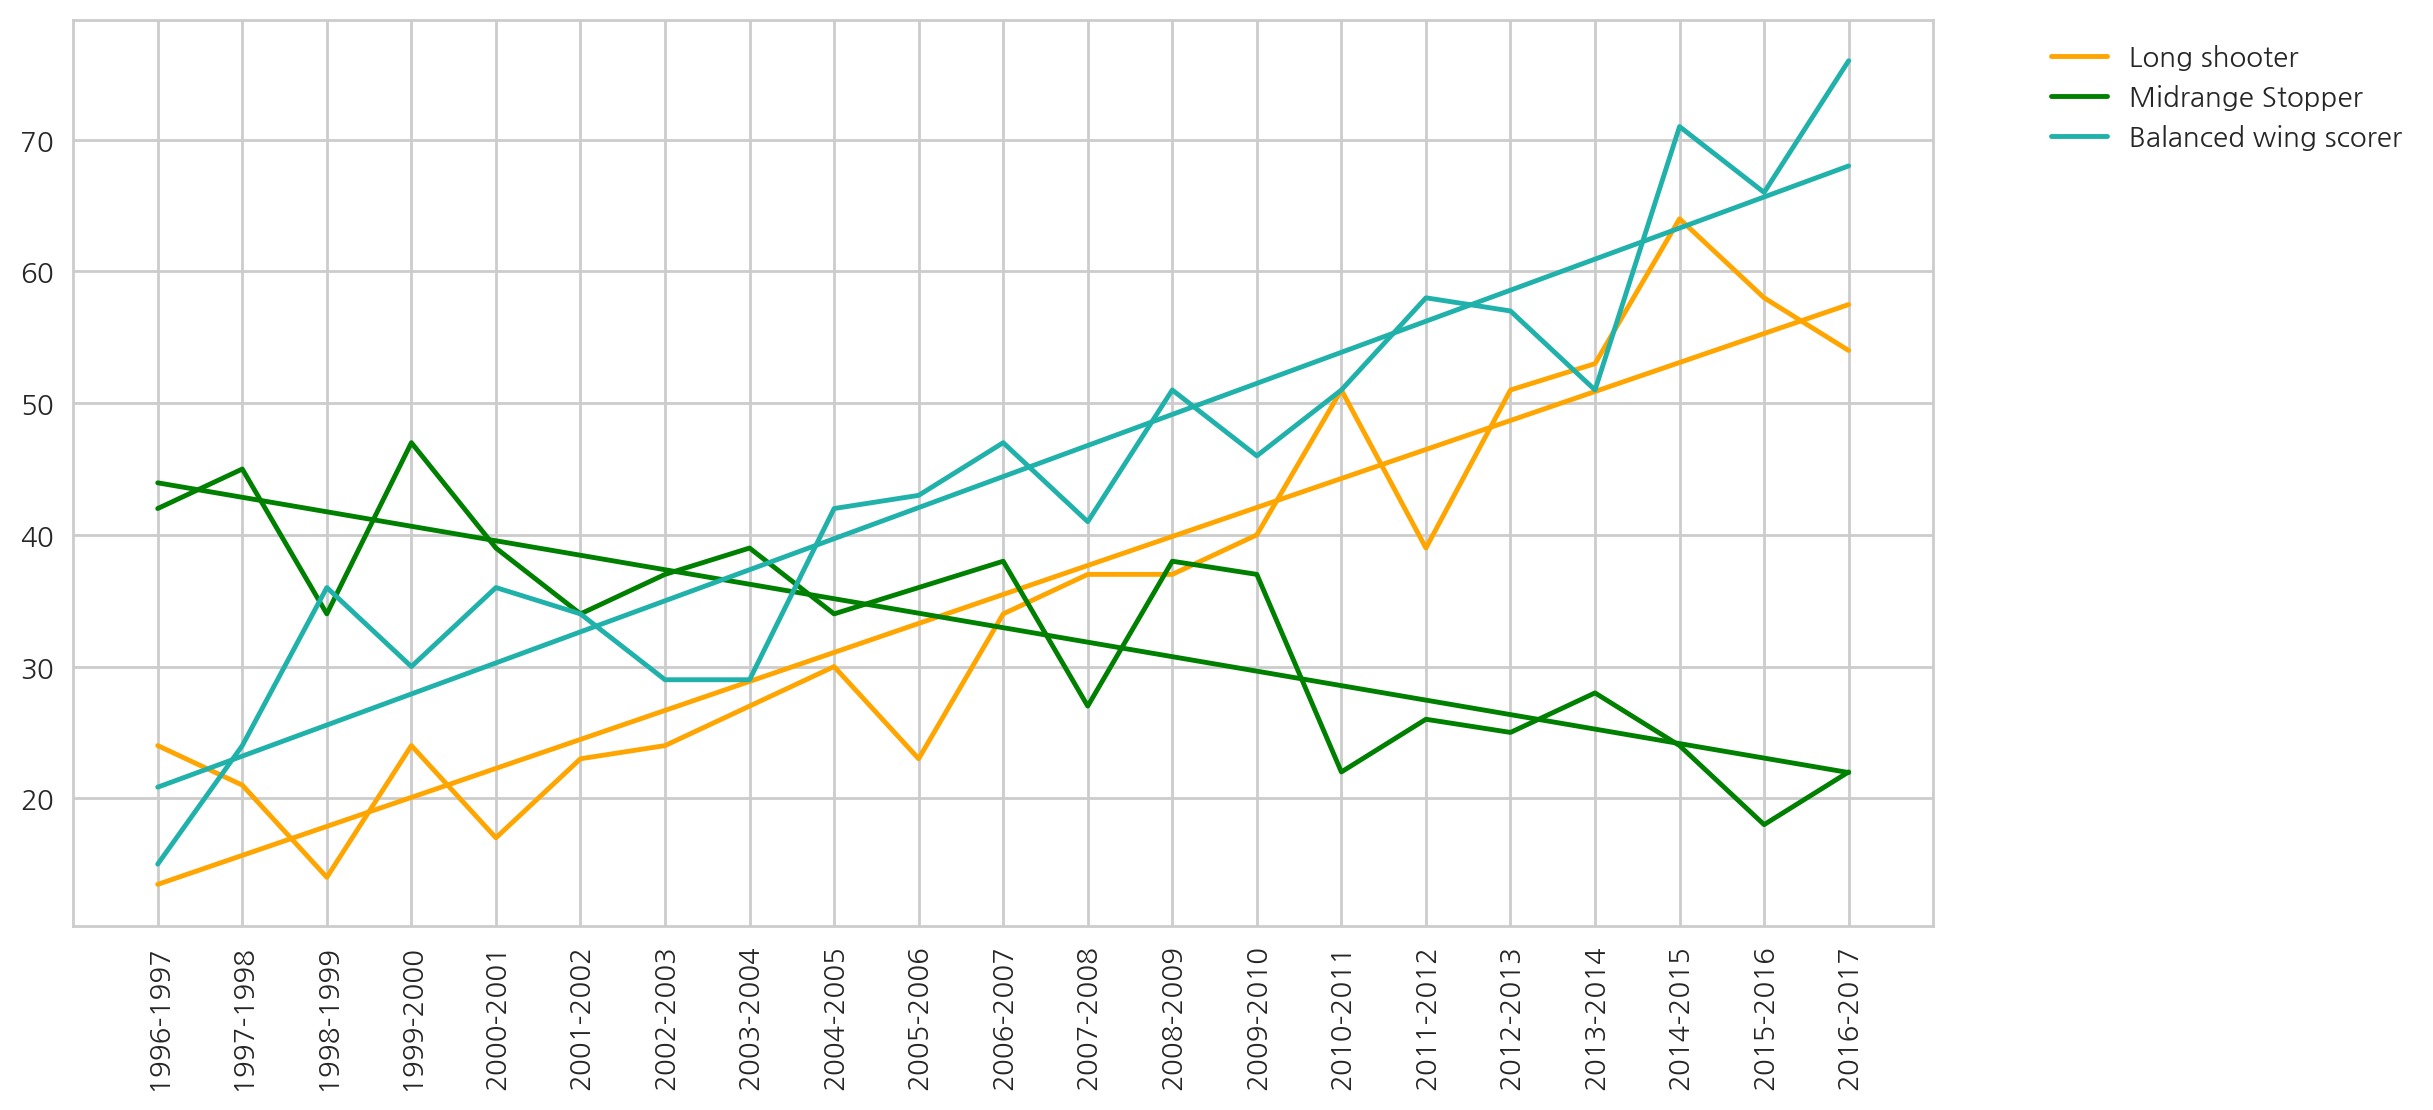

In [203]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(21)

for i in [1,3,6]:
    plt.plot(np.array(season0.iloc[i,:]), color=color[i], label = naming[i])
    plt.plot(t, coef[i][0] + coef[i][1]*t, color=color[i])

plt.xticks(range(21), season0.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

 #### 위에서 확인한 바와 같이,  Balanced wing scorer , Long shooter,  Midrange stopper는 전체 연도별 흐름에서 일정한 추세를 가지고 있는 것을 알 수 있었다. 이는 점점 90년대에는 센터 위주의 농구 였지만 점점 가드 위주의 농구로 전환됨에 따라 이런 추세를 띈 것으로 보인다.

## 1999년 이전 추세

In [145]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(3).reshape(-1,1),season0.iloc[i,:3])
    coef_1[i][0] = model.intercept_
    coef_1[i][1] = model.coef_
    print(model.score(np.arange(3).reshape(-1,1),season0.iloc[i,:3]))

0.182432432432
0.949367088608
0.942307692308
0.494845360825
0.75
1.0
0.993243243243
1.0
0.167808219178
0.519230769231


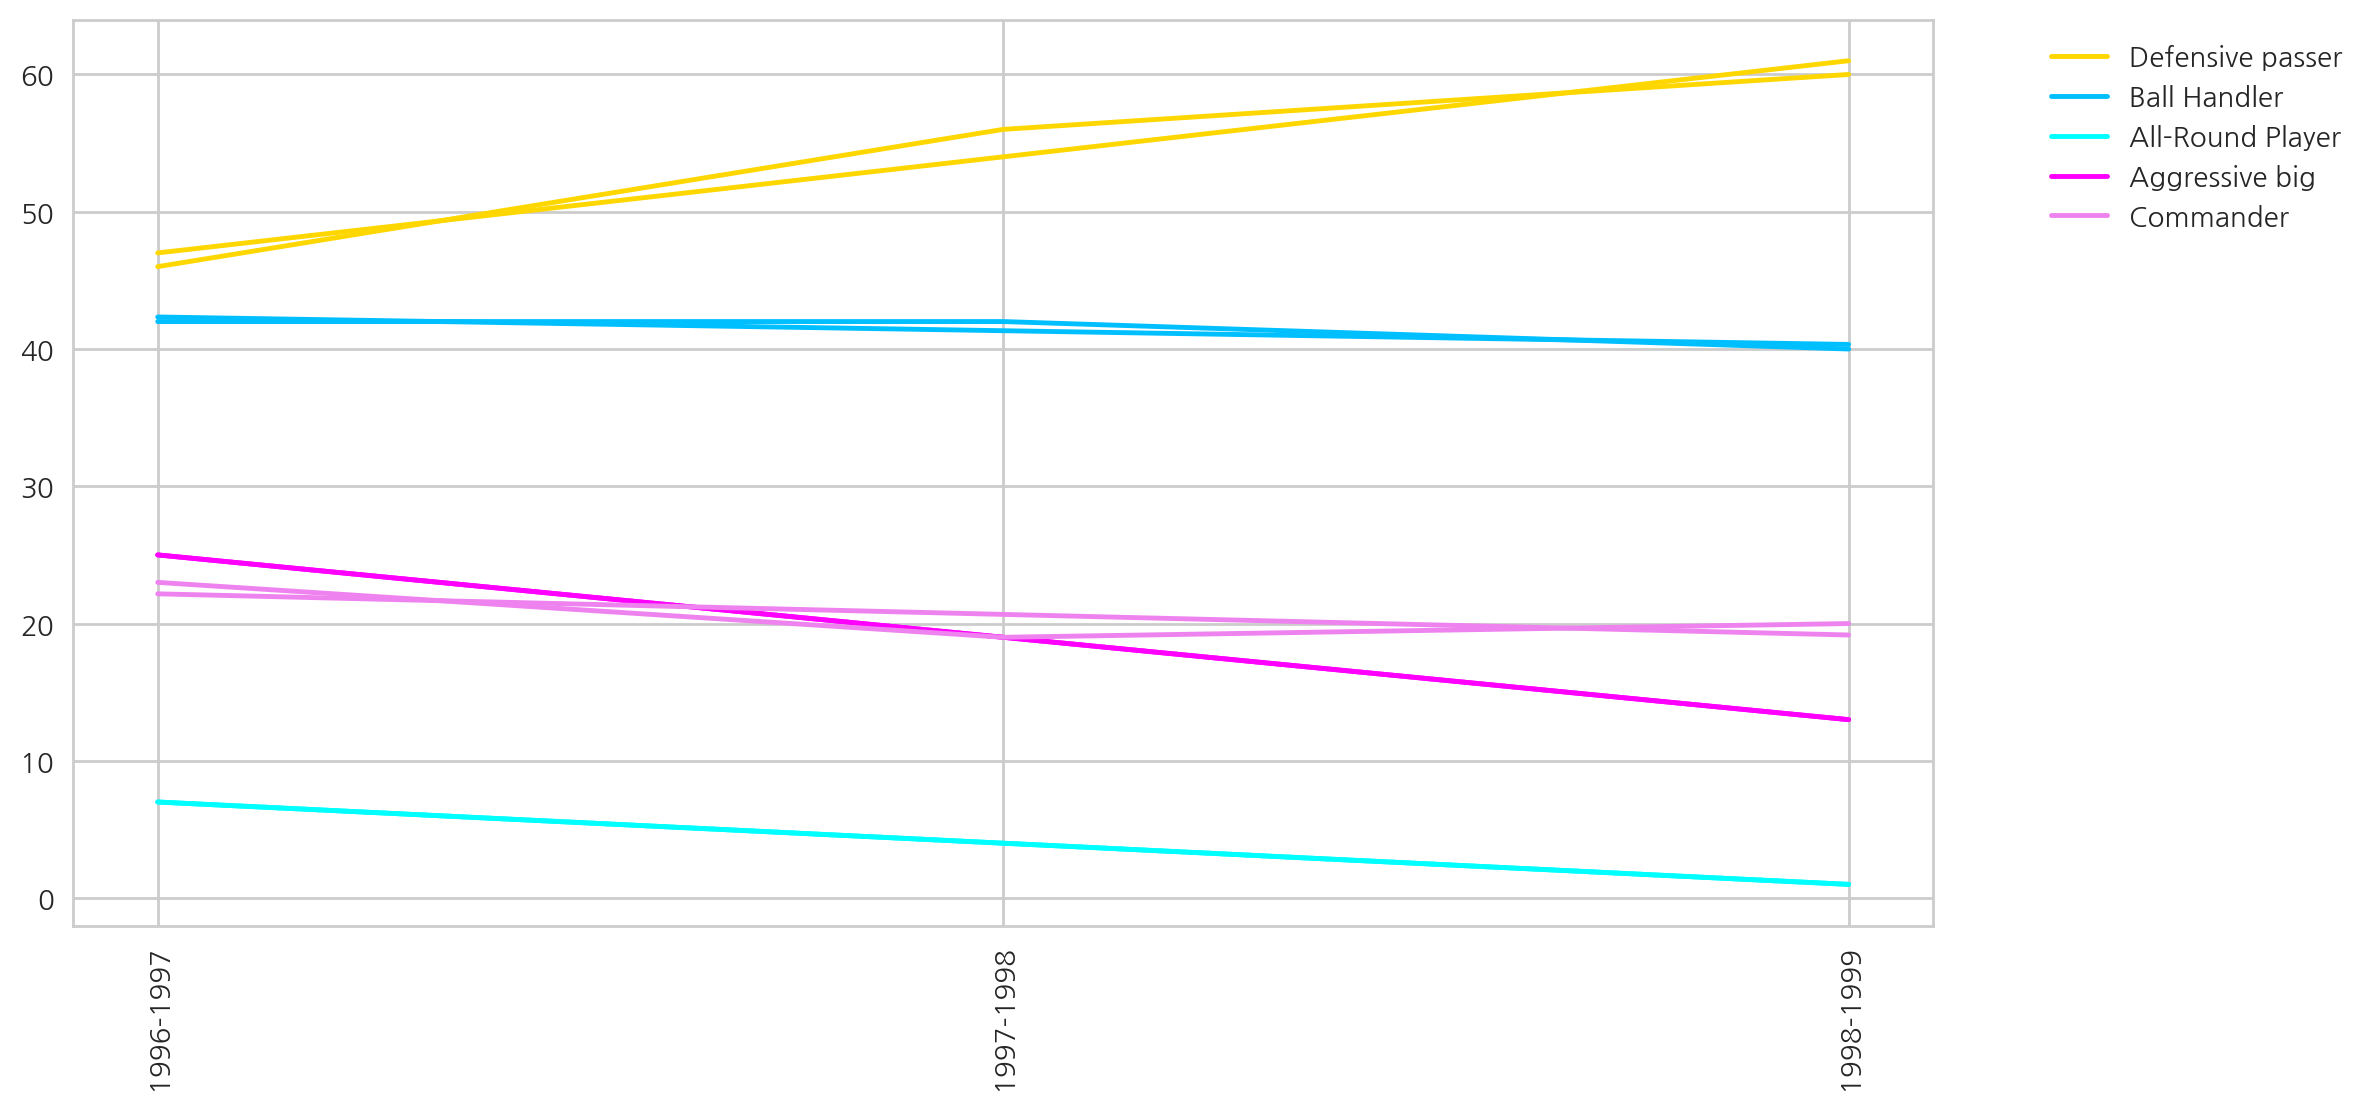

In [204]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(3)

for i in [2,4,5,7,9]:
    plt.plot(np.array(season0.iloc[i,:3]), color=color[i], label = naming[i])
    plt.plot(t, coef_1[i][0] + coef_1[i][1]*t, color=color[i])

plt.xticks(range(3), season0.columns[:3], rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 센터의 시대가 끝나감에 따라서  Aggressive big의 감소추세가 나타나며, Defensive passer가 증가추세가 나타난다.

## 1999 - 2009년 추세

In [147]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(10).reshape(-1,1),season0.iloc[i,3:13])
    coef_2[i][0] = model.intercept_
    coef_2[i][1] = model.coef_
    print(model.score(np.arange(10).reshape(-1,1),season0.iloc[i,3:13]))

0.0187708466397
0.729430806582
0.528555422478
0.309901108066
0.159072166494
0.72790988098
0.657246956367
0.0198149604825
0.232067510549
0.220530665507


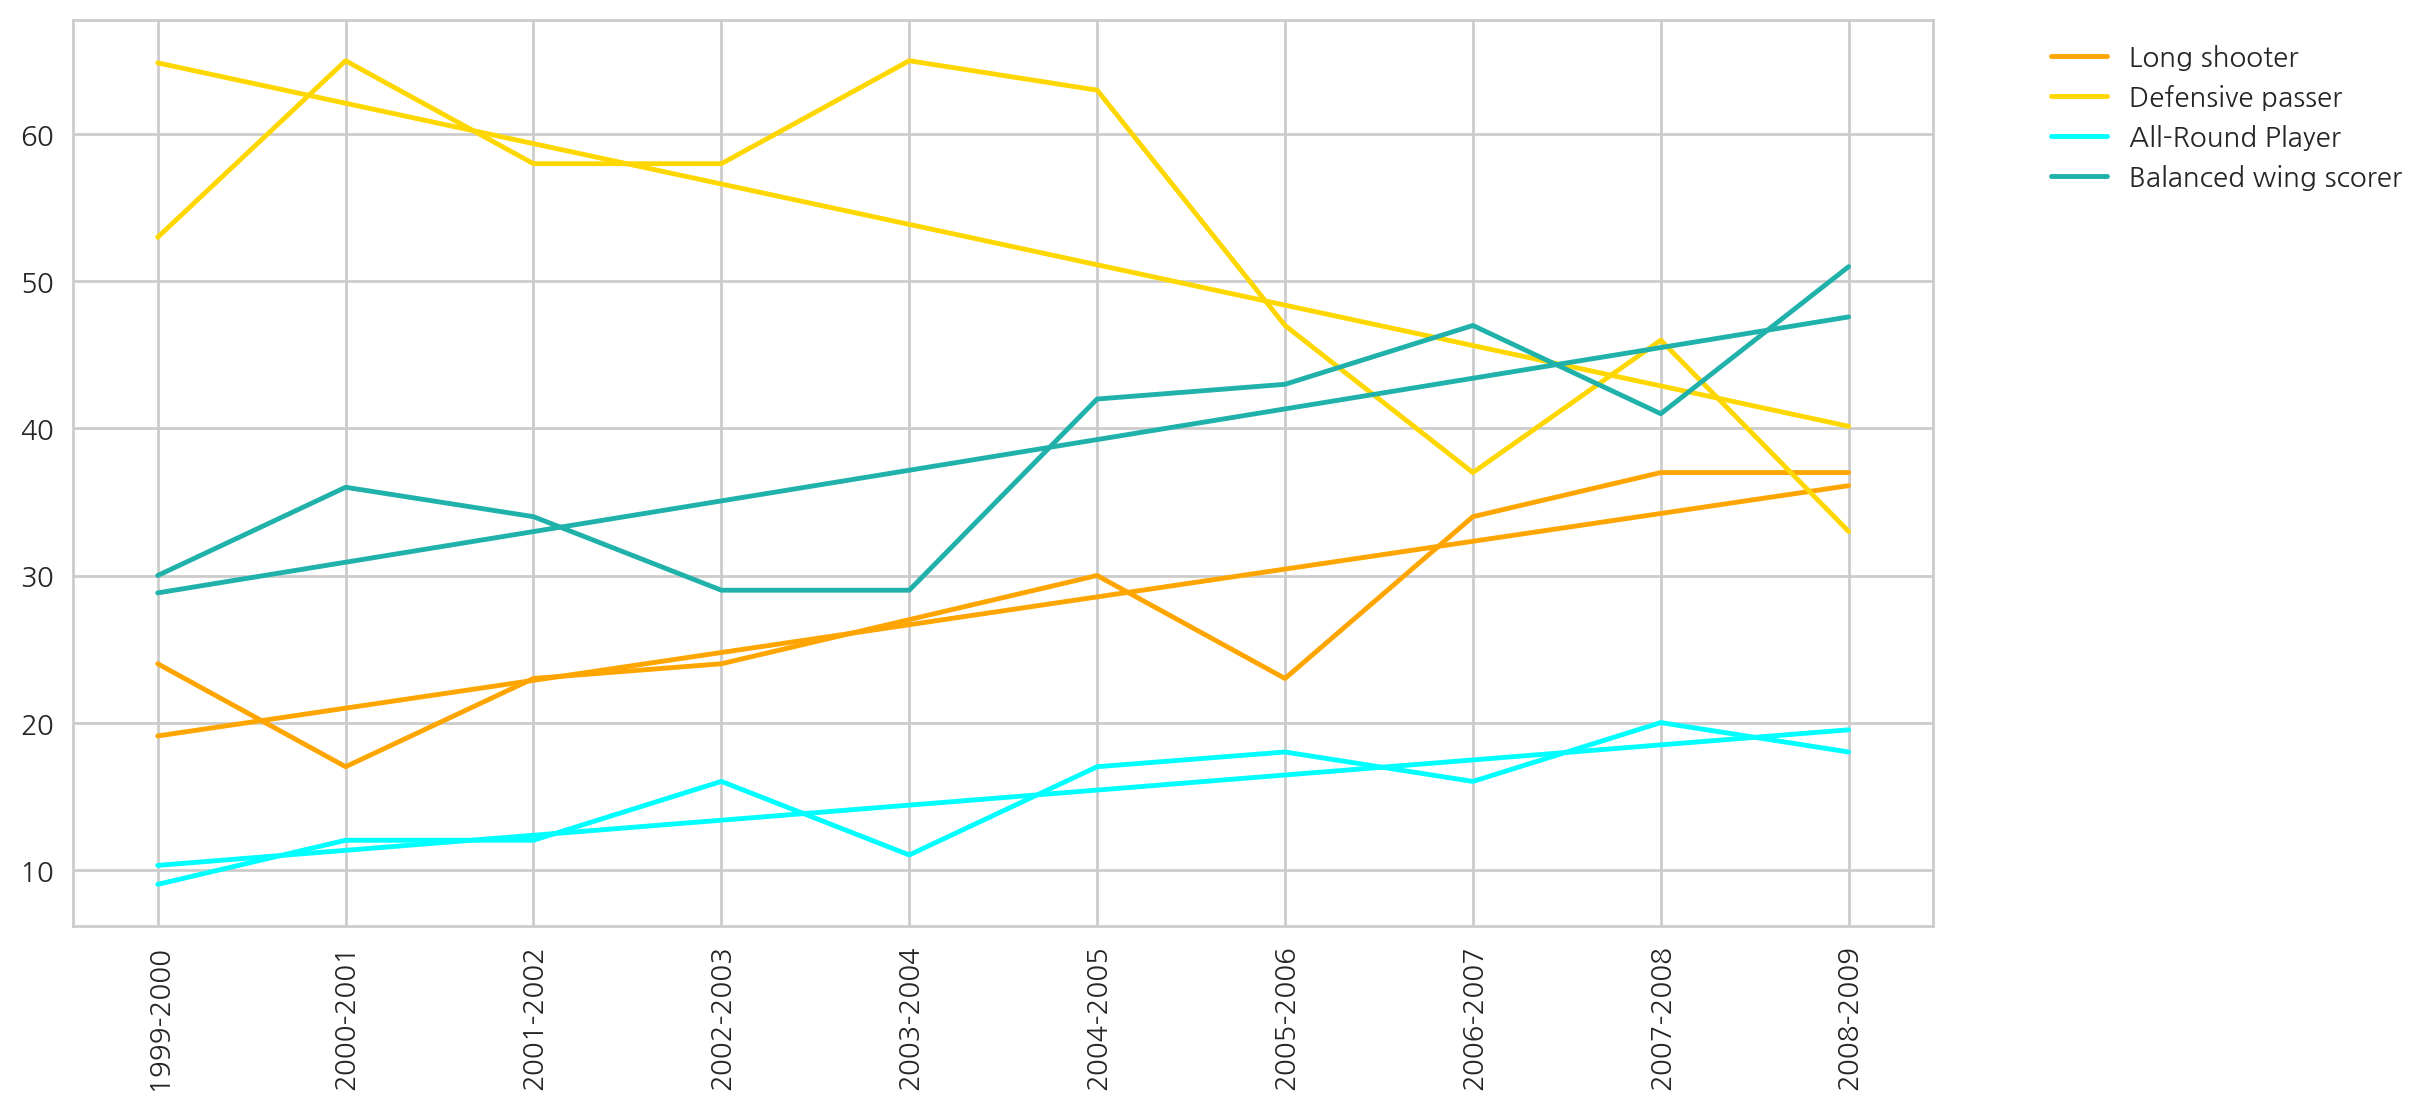

In [201]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(10)

for i in [1,2,5,6]:
    plt.plot(np.array(season0.iloc[i,3:13]), color=color[i], label = naming[i])
    plt.plot(t, coef_2[i][0] + coef_2[i][1]*t, color=color[i])

plt.xticks(range(10), season0.columns[3:13], rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 슈팅가드의 시대가 시작됨에 따라, shooter와 관련된 포지션의 증가를 확인할 수 있다.

## 2010- 이후 추세

In [150]:
from sklearn.linear_model import LinearRegression
for i in range(10):
    model = LinearRegression().fit(np.arange(8).reshape(-1,1),season0.iloc[i,13:])
    coef_3[i][0] = model.intercept_
    coef_3[i][1] = model.coef_
    print(model.score(np.arange(8).reshape(-1,1),season0.iloc[i,13:]))

0.281128071737
0.529767911201
0.131887309898
0.440288079114
0.500487028577
0.314183123878
0.769729630983
0.379372602121
0.16113310996
0.36525974026


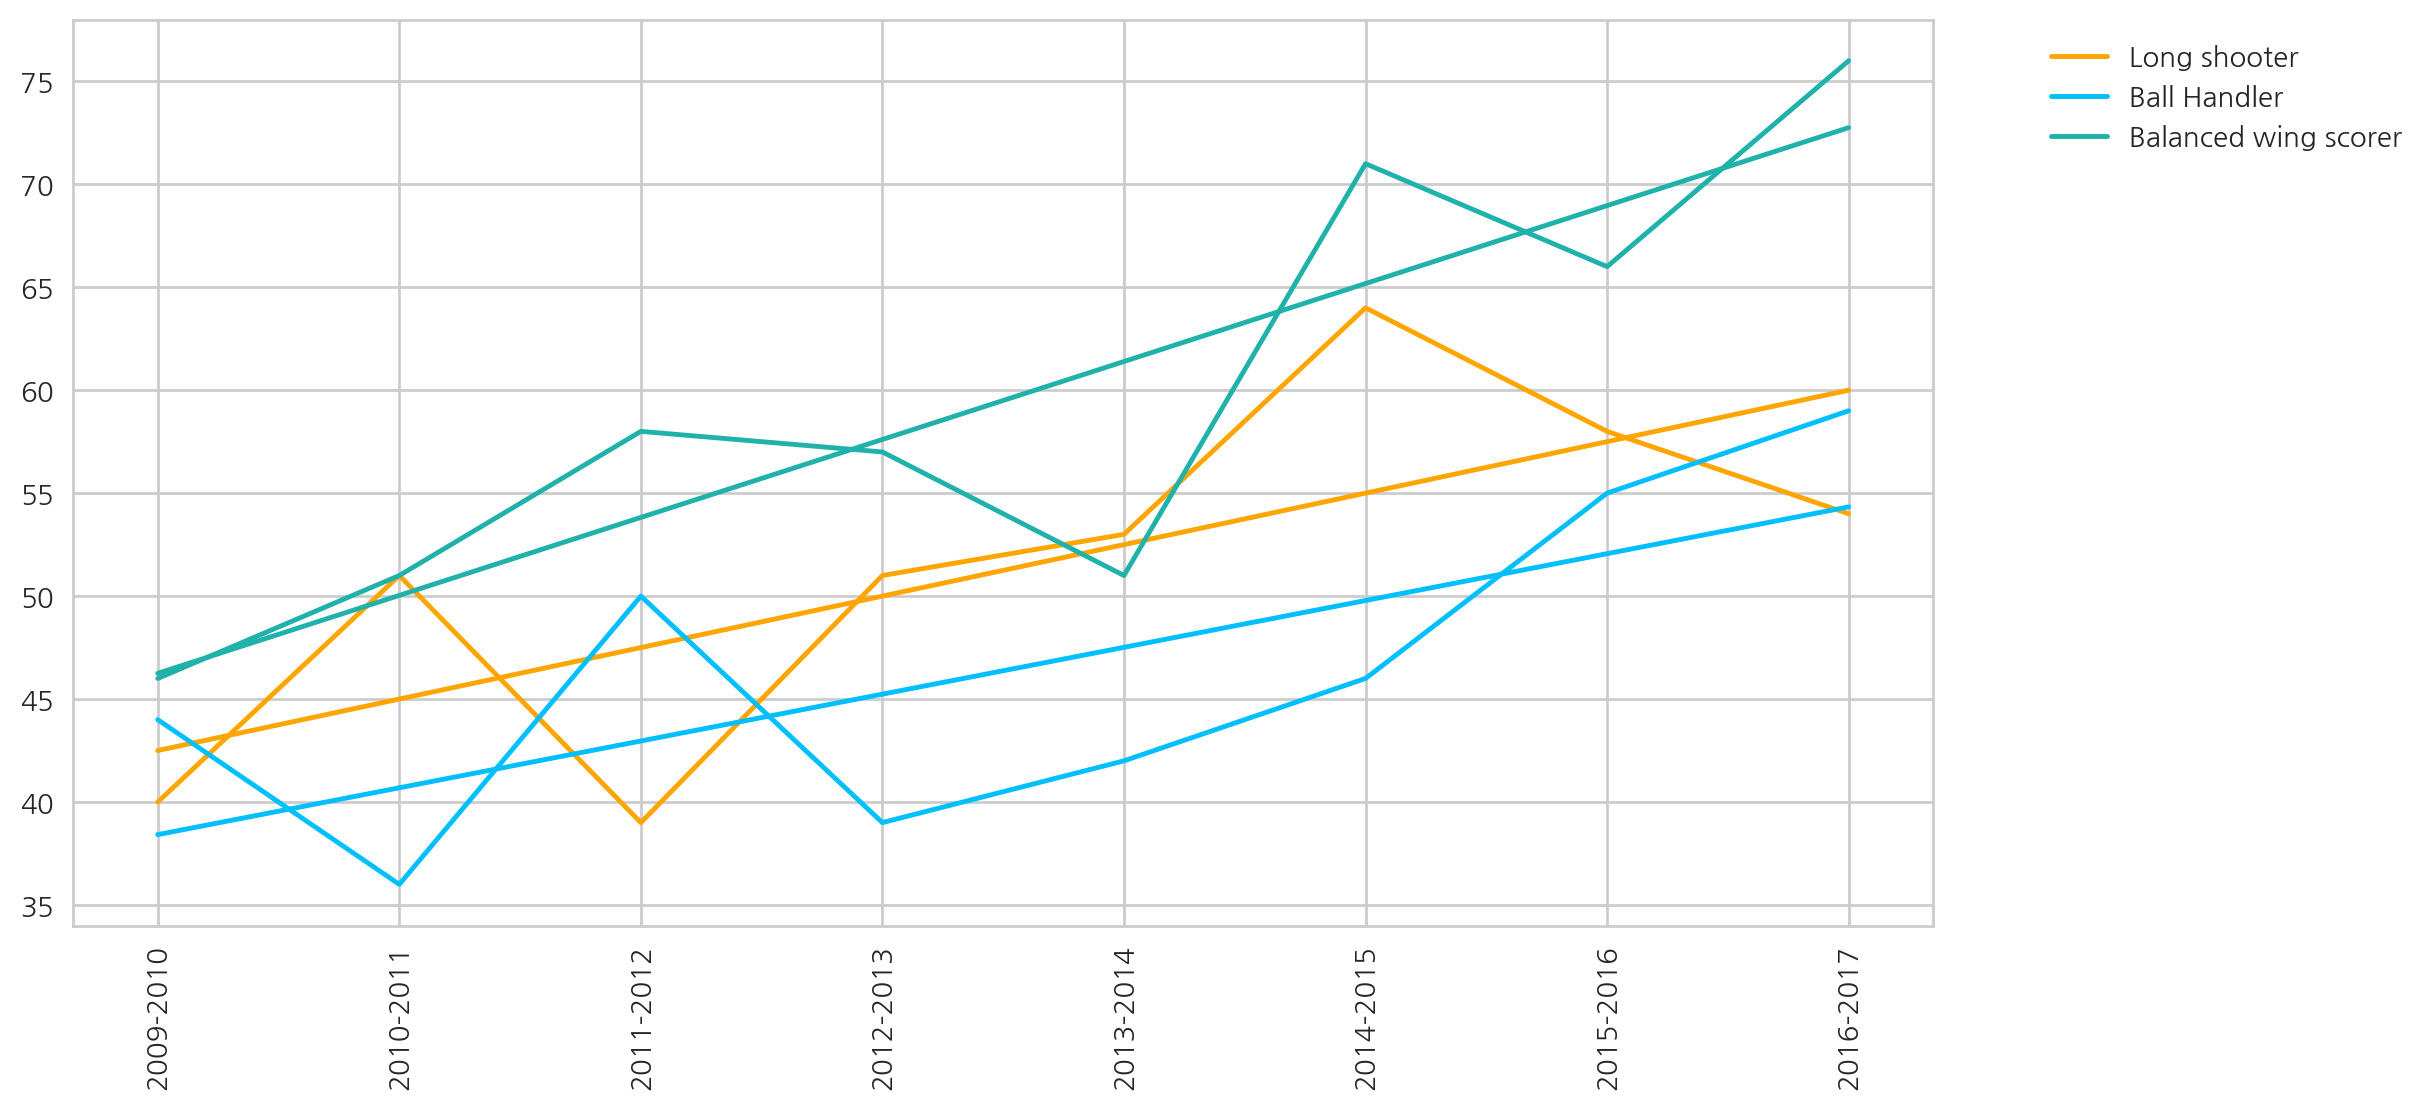

In [200]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)
t = np.arange(8)

for i in [1,4,6]:
    plt.plot(np.array(season0.iloc[i,13:]), color=color[i], label = naming[i])
    plt.plot(t, coef_3[i][0] + coef_3[i][1]*t, color=color[i])

plt.xticks(range(8), season0.columns[13:], rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### 스몰볼의 흐름에 따라서  Long shooter, Ball Handler, Balancer wing scorer의 증가를 확인 할 수 있었다.

# 4. Conclusion & further reserch
### Conclusion

- **K-Means 클러스터링**을 이용하여 NBA Position에 대해 기존의 5가지의 분류와는 다른 **새로운 10가지 포지션으로의 분류**를 시행함

- **새롭게 정의한 포지션** 별 년도별 흐름 파악

### further research
- 수비에 관한 구체적인 기록들이 클러스터링 부분에 많이 반영되지 않아 향후 **수비 관련 지표들에 대해 더 추가하여 반영할 필요**가 있음

- **2차 스탯 및 플레이오프 스탯** 등을 반영할 수 있는 더 정교한 모델 및 클러스터링 작업과 추가적 데이터 확보




# 5. References
1. A new perspective on positions in baskerball players using cluster analysis
http://www.sloansportsconference.com/wp-content/uploads/2012/02/44-Lutz_cluster_analysis_NBA.pdf

2. Modern NBA player positions - using Unsupervised clustering to uncover Functional Roles in Basketball도 참고)
https://medium.com/hanman/the-evolution-of-nba-player-positions-using-unsupervised-clustering-to-uncover-functional-roles-a1d07089935c

3. A New Perspective On Positions In Basketball Players Using Cluster Analysis
http://www.academia.edu/28430572/A_New_Perspective_On_Positions_In_Basketball_Players_Using_Cluster_Analysis

4. NBA.com Player, Combination, Team stats
5. NBAminer Player stats
6. http:// Basketball-reference.com
<br /